In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Context

In [129]:
# Контекст
# The actual Titanic data
df = pd.read_csv('train.csv');
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [130]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [131]:
df['Survived'].unique().tolist()

[1, 0]

In [132]:
df['Pclass'].unique().tolist()

[1, 3, 2]

In [133]:
df['Sex'].unique().tolist()

['male', 'female']

In [134]:
df['Embarked'].unique().tolist()

['S', 'C', 'Q', nan]

In [7]:
'''
The dataset contains Titanic's passengers infoormation:

PassengerId: Passenger Id
Survived: Survival (0 = No, 1 = Yes)
Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name: Passenger name
Sex: Sex (male, female)
Age: Age in years
SibSp: of siblings / spouses aboard the Titanic
Parch: of parents / children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
'''

"\nThe dataset contains Titanic's passengers infoormation:\n\nPassengerId: Passenger Id\nSurvived: Survival (0 = No, 1 = Yes)\nPclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)\nName: Passenger name\nSex: Sex (male, female)\nAge: Age in years\nSibSp: of siblings / spouses aboard the Titanic\nParch: of parents / children aboard the Titanic\nTicket: Ticket number\nFare: Passenger fare\nCabin: Cabin number\nEmbarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)\n"

# Data quality assessment

In [ ]:
# Оценка качества данных

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [136]:
count_pass = len(df);
print(f"Number of passengers is {count_pass}");

Number of passengers is 100000


In [137]:
print(f"Cabin nan-values is {df['Cabin'].isna().sum() / len(df['Cabin']) * 100} %");

Cabin nan-values is 67.866 %


In [138]:
print(f"Age nan-values is {df['Age'].isna().sum() / len(df['Age']) * 100} %");

Age nan-values is 3.292 %


In [34]:
print(f"Ticket nan-values is {df['Ticket'].isna().sum() / len(df['Ticket']) * 100} %");

Ticket nan-values is 4.623 %


In [35]:
print(f"Fare nan-values is {df['Fare'].isna().sum() / len(df['Fare']) * 100} %");

Fare nan-values is 0.134 %


In [36]:
print(f"Embarked nan-values is {df['Embarked'].isna().sum() / len(df['Embarked']) * 100} %");

Embarked nan-values is 0.25 %


In [20]:
#несколько колонок содержат NaN 
#There are a few columns with NaN values

In [139]:
df_ticket = df['Ticket'];
df_ticket = df_ticket.dropna();
dublicated_ticket = len(df_ticket[df_ticket.duplicated() == True]);
print(f"Number of dublicated tickets is {dublicated_ticket}. It's {(dublicated_ticket / len(df_ticket)) * 100:.3f} %");

Number of dublicated tickets is 20046. It's 21.018 %


In [194]:
df_name = df['Name'];
df_name = df_name.dropna();
dublicated_name = len(df_name[df_name.duplicated() == True]);
print(f"Number of dublicated name is {dublicated_name}. It's {(dublicated_name / len(df_name)) * 100:.3f} %");

Number of dublicated name is 7856. It's 7.856 %


In [196]:
len(df[df.duplicated()==True])

0

In [202]:
df_name.mode()

0    Johnson, John
dtype: object

In [140]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data exploration

In [ ]:
# Исследование данных

In [141]:
df['Sex'].replace({'male': 0, 'female': 1},inplace=True)
df['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2},inplace=True)

<AxesSubplot:>

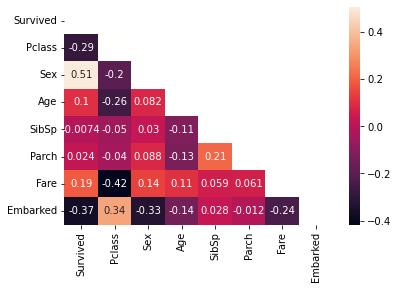

In [142]:
pass_data = df.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin']);
pass_data = pass_data.dropna()
pass_corr =  np.triu(pass_data.corr())
sns.heatmap(data=pass_data.corr(), annot=True, mask = pass_corr)

In [143]:
pass_data['Survived'].replace({0:'No',1:'Yes'},inplace=True)
pass_data['Pclass'].replace({1:'1st',2:'2nd', 3:'3rd'},inplace=True)
pass_data['Embarked'].replace({0:'C', 1:'Q', 2:'S'},inplace=True)
pass_data['Sex'].replace({0:'male', 1: 'female'},inplace=True)

<AxesSubplot:>

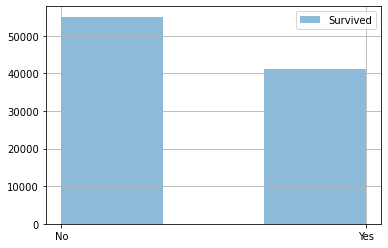

In [144]:
pass_data.Survived.hist(legend=True, alpha=0.5, bins=3)

<AxesSubplot:ylabel='Survived'>

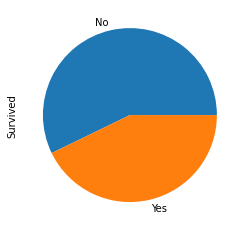

In [145]:
pass_data.Survived.value_counts().plot(kind='pie')

<AxesSubplot:>

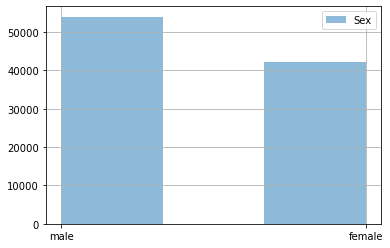

In [85]:
pass_data.Sex.hist(legend=True, alpha=0.5, bins=3)

<AxesSubplot:ylabel='Sex'>

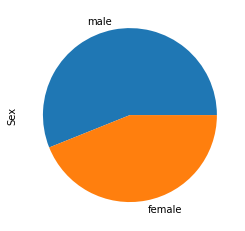

In [86]:
pass_data.Sex.value_counts().plot(kind='pie')

<AxesSubplot:>

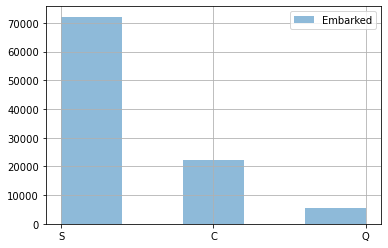

In [30]:
pass_data.Embarked.hist(legend=True, alpha=0.5, bins=5)

<AxesSubplot:ylabel='Embarked'>

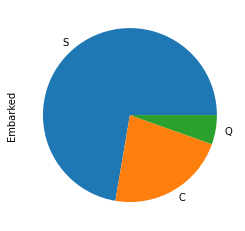

In [28]:
pass_data.Embarked.value_counts().plot(kind='pie')

<AxesSubplot:>

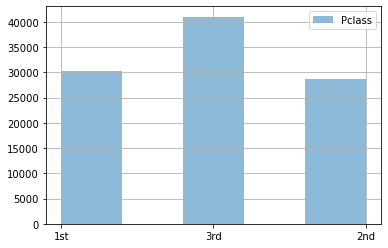

In [31]:
pass_data.Pclass.hist(legend=True, alpha=0.5, bins=5)

<AxesSubplot:ylabel='Pclass'>

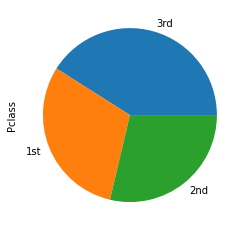

In [32]:
pass_data.Pclass.value_counts().plot(kind='pie')

<AxesSubplot:>

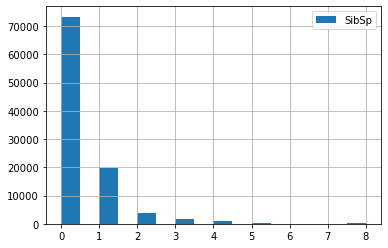

In [40]:
pass_data.SibSp.hist(legend=True, alpha=1, bins = 16)

<AxesSubplot:ylabel='SibSp'>

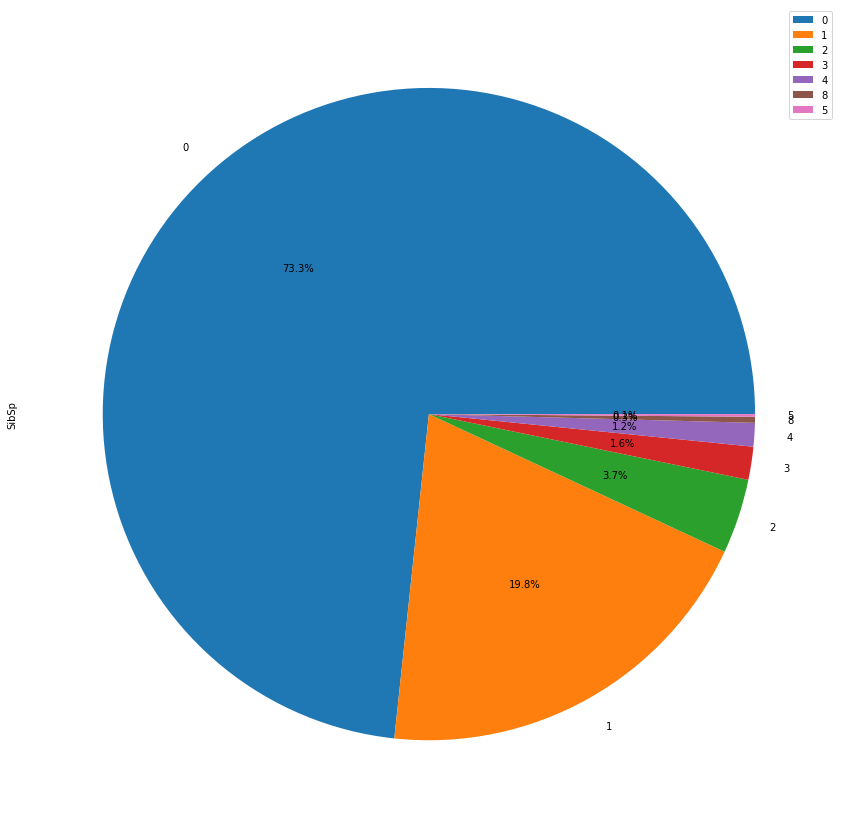

In [47]:
pass_data.SibSp.value_counts().plot(kind='pie', legend = True, figsize=(20,15), autopct='%1.1f%%')

In [208]:
men = len(df[df['Sex'] == 0]);
women = len(df[df['Sex'] == 1]);
men_s = len(df[(df['Sex'] == 0) & (df['Survived'] == 1)]);
women_s = len(df[(df['Sex'] == 1) & (df['Survived'] == 1)]);
all_pass = men + women;
print(f'Number of men on the titanic = {men} ({men / all_pass * 100} %), number of survived = {men_s} ({men_s / men * 100}) %');
print(f'Number of women on the titanic = {women} ({women / all_pass * 100} %), number of survived = {women_s} ({women_s / women * 100}) %');

Number of men on the titanic = 56114 (56.114 %), number of survived = 11548 (20.579534519014864) %
Number of women on the titanic = 43886 (43.885999999999996 %), number of survived = 31226 (71.15253155903933) %


Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

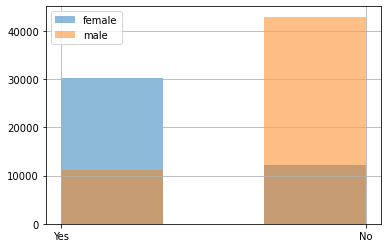

In [88]:
pass_data.groupby('Sex').Survived.hist(legend=True, alpha=0.5, bins=3)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Pclass, dtype: object

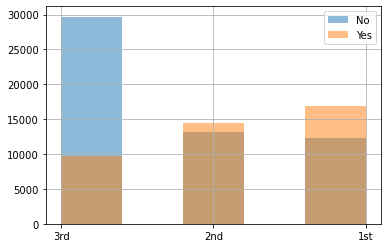

In [147]:
pass_data.groupby('Survived').Pclass.hist(legend=True, alpha=0.5, bins=5)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

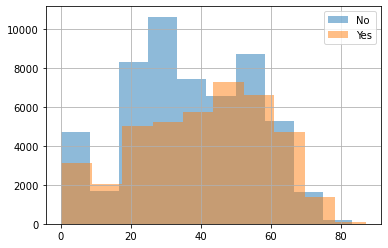

In [54]:
pass_data.groupby('Survived').Age.hist(legend=True, alpha=0.5)

In [89]:
pass_data.Age.min()

0.08

In [90]:
pass_data.Age.max()

87.0

In [148]:
conditions = [
    (pass_data['Age'] <= 3),
    (pass_data['Age'] > 3) & (pass_data['Age'] <= 7),
    (pass_data['Age'] > 7) & (pass_data['Age'] <= 13),
    (pass_data['Age'] > 13) & (pass_data['Age'] <= 18),
    (pass_data['Age'] > 18) & (pass_data['Age'] <= 44),
    (pass_data['Age'] > 44) & (pass_data['Age'] <= 59),
    (pass_data['Age'] > 59) & (pass_data['Age'] <= 75),
    (pass_data['Age'] > 75)
    ]

values = ['baby', 'child', 'schoolboy', 'teenager', 'young', 'adult', 'elderly', 'old']

pass_data['Age_range'] = np.select(conditions, values)

In [149]:
pass_data['Age_range'].unique().tolist()

['baby', 'young', 'child', 'elderly', 'adult', 'teenager', 'schoolboy', 'old']

<AxesSubplot:ylabel='Age_range'>

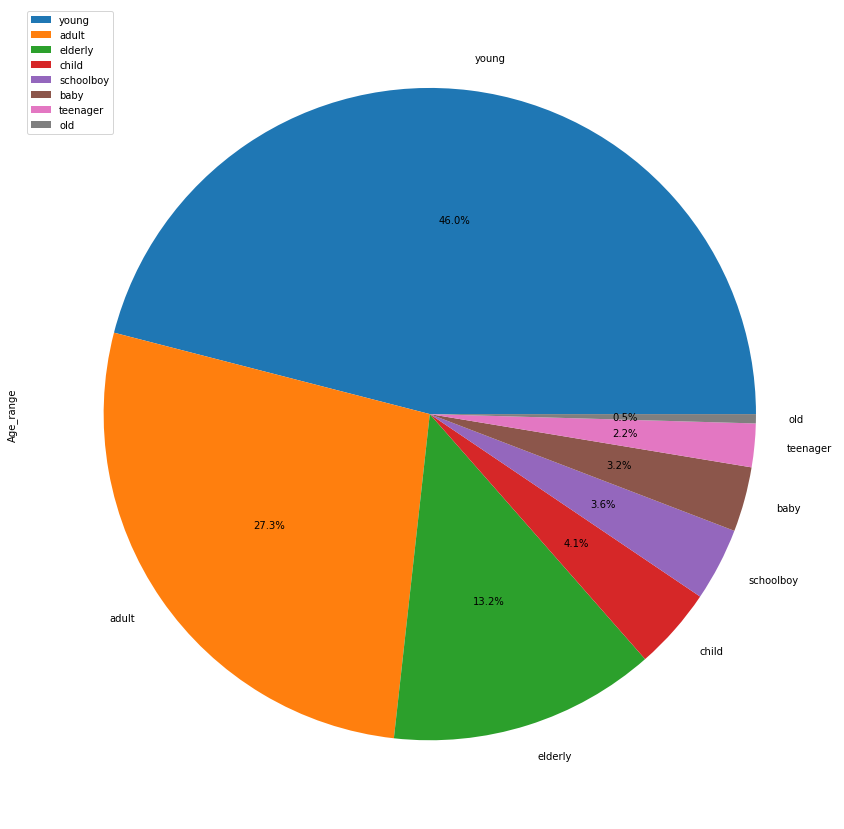

In [150]:
pass_data.Age_range.value_counts().plot(kind='pie', legend = True, figsize=(20,15), autopct='%1.1f%%')

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age_range, dtype: object

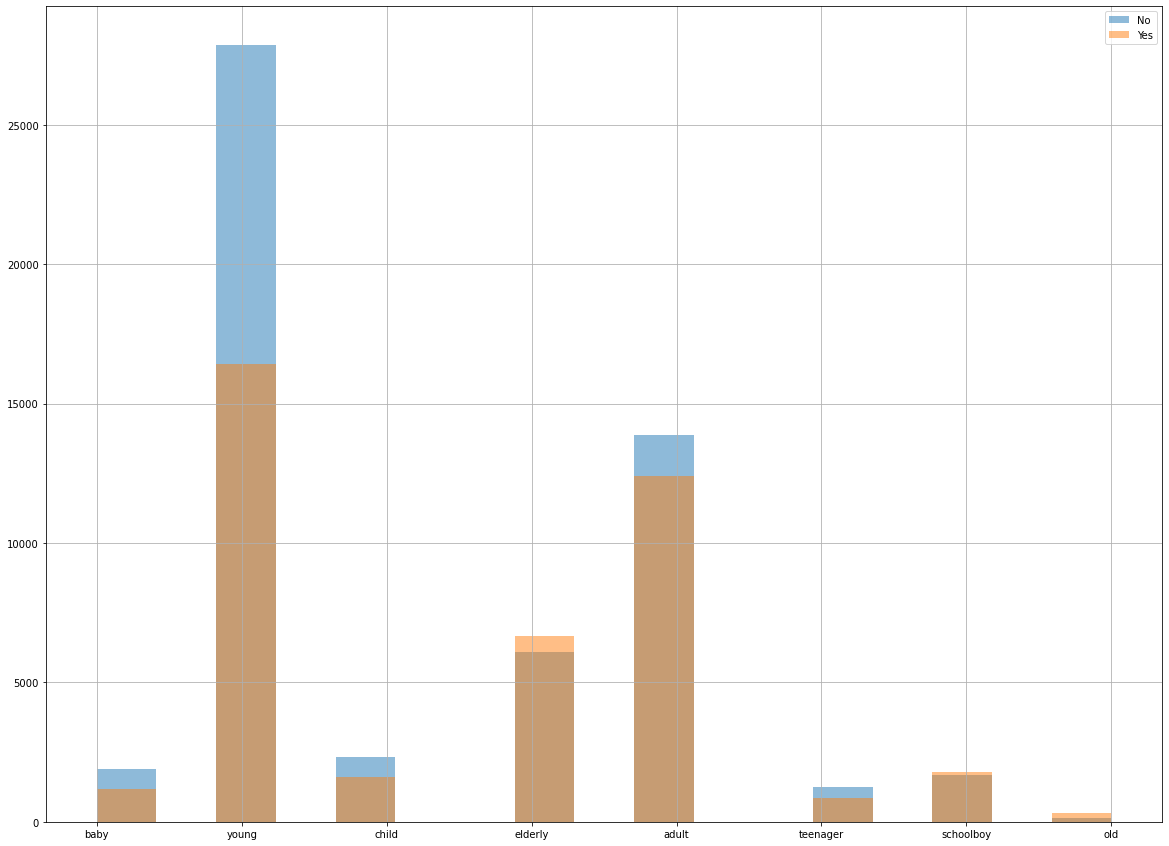

In [151]:
pass_data.groupby('Survived').Age_range.hist(figsize=(20,15),legend=True, alpha=0.5, bins=17)

In [152]:
male_data = pass_data.loc[pass_data['Sex'] == 'male'];
male_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
2,No,3rd,male,0.33,1,2,71.29,S,baby
3,No,3rd,male,19.00,0,0,13.04,S,young
4,Yes,3rd,male,25.00,0,0,7.76,S,young
5,No,2nd,male,35.00,0,0,6.71,S,young
6,No,3rd,male,7.00,0,0,9.77,S,child


In [153]:
female_data = pass_data.loc[pass_data['Sex'] == 'female'];
female_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range
7,Yes,3rd,female,6.0,1,2,31.50,S,child
14,Yes,1st,female,44.0,0,1,28.40,C,young
15,Yes,3rd,female,57.0,0,0,9.31,S,adult
19,Yes,1st,female,61.0,0,4,205.01,Q,elderly
20,No,3rd,female,17.0,0,0,8.28,S,teenager


Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age_range, dtype: object

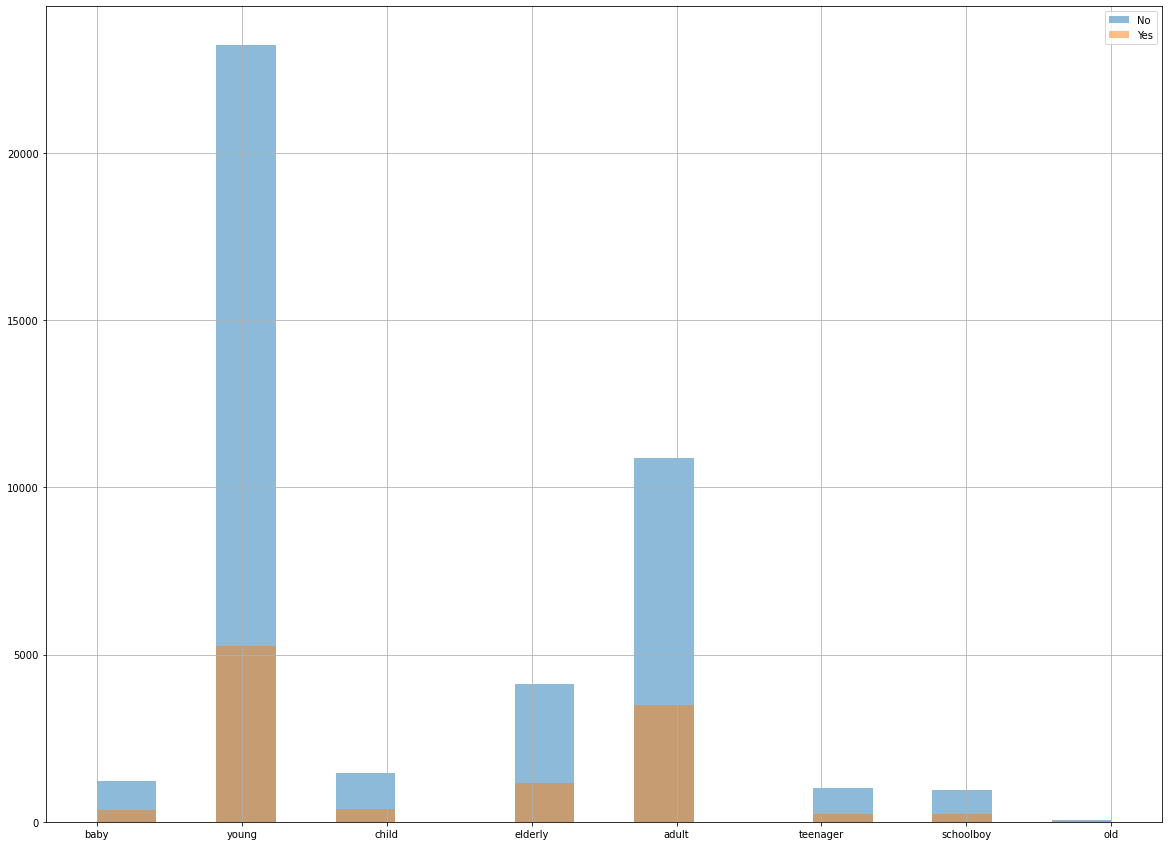

In [157]:
male_data.groupby('Survived').Age_range.hist(figsize=(20,15),legend=True, alpha=0.5, bins=17)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age_range, dtype: object

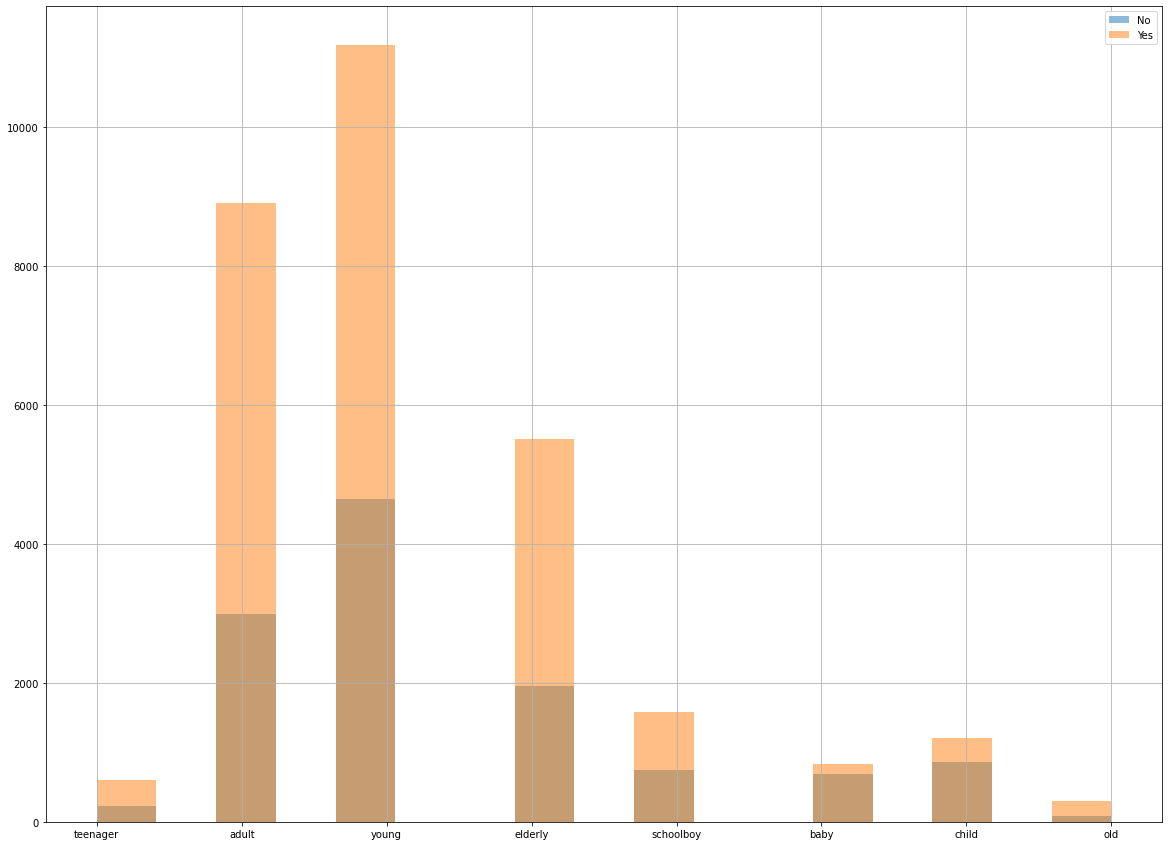

In [158]:
female_data.groupby('Survived').Age_range.hist(figsize=(20,15),legend=True, alpha=0.5, bins=17)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Pclass, dtype: object

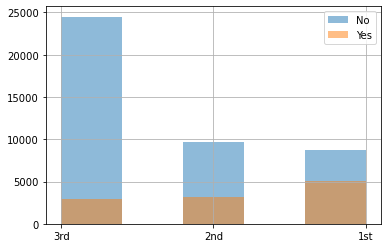

In [160]:
male_data.groupby('Survived').Pclass.hist(legend=True, alpha=0.5, bins=5)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Pclass, dtype: object

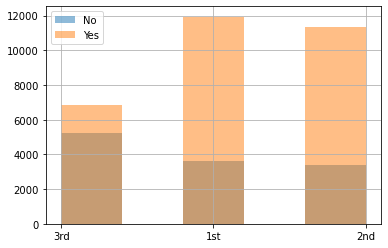

In [161]:
female_data.groupby('Survived').Pclass.hist(legend=True, alpha=0.5, bins=5)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SibSp, dtype: object

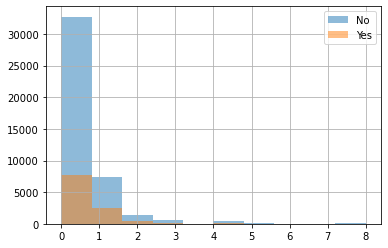

In [168]:
male_data.groupby('Survived').SibSp.hist(legend=True, alpha=0.5)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SibSp, dtype: object

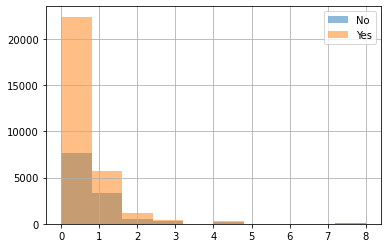

In [169]:
female_data.groupby('Survived').SibSp.hist(legend=True, alpha=0.5)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Parch, dtype: object

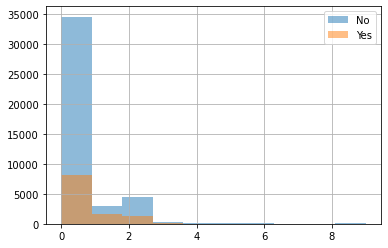

In [170]:
male_data.groupby('Survived').Parch.hist(legend=True, alpha=0.5)

Survived
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Parch, dtype: object

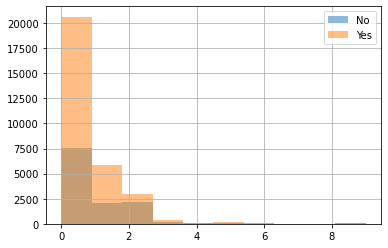

In [171]:
female_data.groupby('Survived').Parch.hist(legend=True, alpha=0.5)

In [176]:
female_data.drop(columns=['Sex']);

In [190]:
female_data['Age_range'].replace({'baby':0, 'child':1, 'schoolboy':2, 'teenager':3, 'young':4, 'adult':5, 'elderly':6, 'old':7},inplace=True);

In [183]:
female_data['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2},inplace=True);
female_data['Survived'].replace({'No': 0, 'Yes': 1},inplace=True);
female_data['Pclass'].replace({'1st': 1, '2nd': 2, '3rd':3},inplace=True);

<AxesSubplot:>

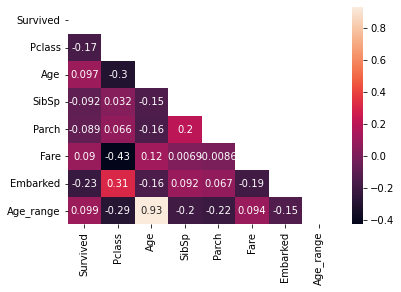

In [187]:
female_corr =  np.triu(female_data.corr())
sns.heatmap(data=female_data.corr(), annot=True, mask = female_corr)

In [188]:
male_data.drop(columns=['Sex']);

In [191]:
male_data['Age_range'].replace({'baby':0, 'child':1, 'schoolboy':2, 'teenager':3, 'young':4, 'adult':5, 'elderly':6, 'old':7},inplace=True);

In [192]:
male_data['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2},inplace=True);
male_data['Survived'].replace({'No': 0, 'Yes': 1},inplace=True);
male_data['Pclass'].replace({'1st': 1, '2nd': 2, '3rd':3},inplace=True);

<AxesSubplot:>

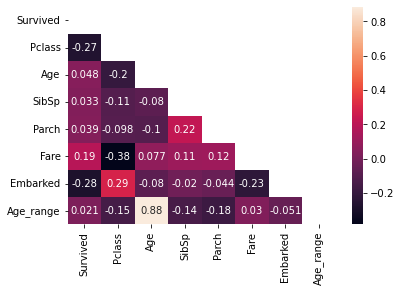

In [193]:
male_corr =  np.triu(male_data.corr())
sns.heatmap(data=male_data.corr(), annot=True, mask = male_corr)

In [213]:
male_s_data = male_data.loc[male_data['Survived'] == 1];
female_s_data = female_data.loc[female_data['Survived'] == 1];
male_s_data.drop(columns=['Survived']);
female_s_data.drop(columns=['Survived']);

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Parch, dtype: object

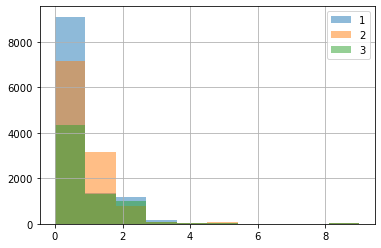

In [215]:
female_s_data.groupby('Pclass').Parch.hist(legend=True, alpha=0.5)

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SibSp, dtype: object

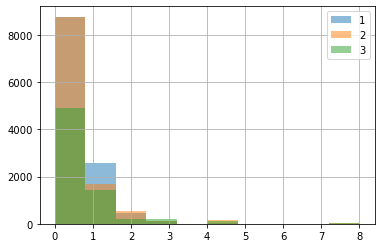

In [217]:
female_s_data.groupby('Pclass').SibSp.hist(legend=True, alpha=0.5)

# Summary

In [ ]:
# Отчет

In [210]:
print(f"Number of passengers is {count_pass}");
print(f"Number of dublicated tickets is {dublicated_ticket}. It's {(dublicated_ticket / len(df_ticket)) * 100:.3f} %");
print(f"Number of dublicated name is {dublicated_name}. It's {(dublicated_name / len(df_name)) * 100:.3f} %");
print(f"Most popular name is {df_name.mode()}");
print(f'Number of men on the titanic = {men} ({men / all_pass * 100:.3f} %), number of survived = {men_s} ({men_s / men * 100}) %');
print(f'Number of women on the titanic = {women} ({women / all_pass * 100:.3f} %), number of survived = {women_s} ({women_s / women * 100}) %');
print('Most women survived in the first class without relatives on the Titanic.')

Number of passengers is 100000
Number of dublicated tickets is 20046. It's 21.018 %
Number of dublicated name is 7856. It's 7.856 %
Most popular name is 0    Johnson, John
dtype: object
Number of men on the titanic = 56114 (56.114 %), number of survived = 11548 (20.579534519014864) %
Number of women on the titanic = 43886 (43.886 %), number of survived = 31226 (71.15253155903933) %
Most survived women without relatives on the Titanic.
